In [71]:
from IPython.display import IFrame
IFrame("./pdf/ej7tp2.pdf", width=1000, height=500)

### B)
Graficar el diagrama de polos y ceros

In [9]:
import sympy as sp
from sympy.abc import symbols

s, q, k, w0 = symbols('s q k w0')

sos1 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos1 = sos1.subs(k, 1)
sos1 = sos1.subs(w0, 1) # 2KHz * 2pi
sos1 = sos1.subs(q, 2.2222)

sos2 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos2 = sos2.subs(k, 1)
sos2 = sos2.subs(w0, 1.215)
sos2 = sos2.subs(q, 4.533)

sos3 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos3 = sos3.subs(k, 1)
sos3 = sos3.subs(w0, 0.822)
sos3 = sos3.subs(q, 4.533)

print("La transferencia normalizada del filtro es:")

filtro = sos1*sos2*sos3
display(filtro)

La transferencia normalizada del filtro es:


0.0218722526620331*s**3/((s**2 + 0.181336863004633*s + 0.675684)*(s**2 + 0.268034414295169*s + 1.476225)*(s**2 + 0.450004500045*s + 1))

Luego con esta transferencia busco los polos y ceros:

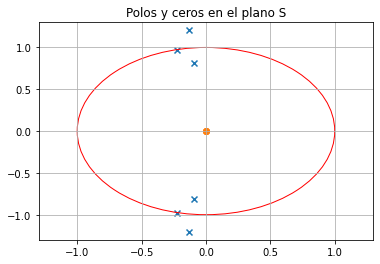

In [67]:
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_numerical_data
import matplotlib.pyplot as plt

top = 0.0218722526620331 * s**3
bot = (s**2 + 0.181 * s + 0.675)*(s**2 + 0.268 * s + 1.476) * (s**2 + 0.450 * s + 1)

tf = TransferFunction(top, bot, s)
data = pole_zero_numerical_data(tf)


circle1 = plt.Circle((0, 0), 1, color='r',fill=False)
plt.title("Polos y ceros en el plano S")
plt.scatter(data[1].real,data[1].imag, marker = 'x')# Polos
plt.scatter(data[0].real,data[0].imag, marker = 'o')# Ceros
plt.xlim([-1.3, 1.3])
plt.ylim([-1.3, 1.3])
plt.grid()

fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)

plt.show
fig.savefig('zero_poles.png')



## C)
Graficar la transferencia (módulo y fase) del filtro pedido

In [77]:
from sympy.plotting import plot
from sympy.abc import symbols
import sympy as sp

s, q, k, w0 = symbols('s q k w0')

sos1 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos1 = sos1.subs(k, 1)
sos1 = sos1.subs(w0, 12566) # 2KHz * 2pi
sos1 = sos1.subs(q, 2.2222)

sos2 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos2 = sos2.subs(k, 1.680)
sos2 = sos2.subs(w0, 1.215*12566)
sos2 = sos2.subs(q, 4.533)

sos3 = k*s*w0/q/(s**2+s*w0/q+w0**2)
sos3 = sos3.subs(k, 2.477)
sos3 = sos3.subs(w0, 0.822*12566)
sos3 = sos3.subs(q, 4.533)

print("La transferencia del filtro es:")

filtro = sos1*sos2*sos3
display(filtro)

La transferencia del filtro es:


180600924252.326*s**3/((s**2 + 2278.67902051621*s + 106693446.879504)*(s**2 + 3368.12045003309*s + 233102357.9361)*(s**2 + 5654.75654756548*s + 157904356))

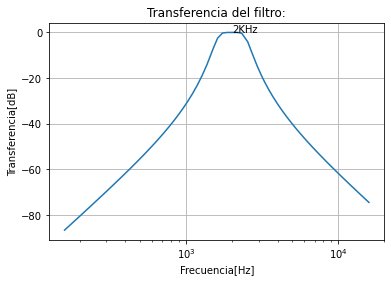

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, bode_magnitude_numerical_data
import math


top = 180629641407.475* s**3
bot = (s**2+2278.79979086698*s+106704756.718539)*(s**2+3368.29896095301*s+233127067.515031)*(s**2+5655.05625056251*s+157921094.355556)

tf = TransferFunction(top, bot, s) 
x,y=bode_magnitude_numerical_data(tf, initial_exp =3 , final_exp = 5)   

y = np.asarray(y)
x = np.asarray(x)/(2*math.pi)

plt.semilogx(x,y)
plt.grid()
plt.title('Transferencia del filtro:')
plt.ylabel('Transferencia[dB]')
plt.xlabel('Frecuencia[Hz]')

plt.annotate('2KHz', xy=(2000, 0))

plt.show()


fig.savefig('TransferFunction.png')

# Circuitos y simulaciónes:


In [78]:
from IPython.display import IFrame
IFrame("./img/Circuitos.png", width=1000, height=500)

In [82]:
from IPython.display import IFrame
IFrame("./img/ej7tp2_cortes.png", width=1000, height=500)

In [79]:
from IPython.display import IFrame
IFrame("./img/ej7tp2_stop.png", width=1000, height=500)